The selectivity of Scd is 8.02


<ipython-input-6-22aa18beeb22>:37: RuntimeWarning: divide by zero encountered in scalar divide
  Scd = F[2]/F[3]
<ipython-input-6-22aa18beeb22>:65: RuntimeWarning: invalid value encountered in divide
  Scd = sol.y[2,:]/sol.y[3,:]


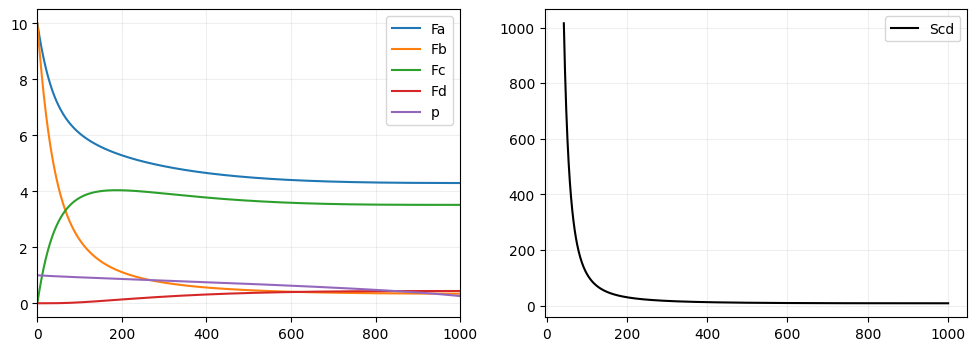

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#  A + 2B -> C (R1)
# 2A + 3C -> D (R2)
coeffs = np.array([-1, -3]) # reactant coeffs of A(R1), and C(R2)

#stoichiometry      A,    B,     C,     D
alfa = np.array([ [-1,   -2,     1,     0],      # R1
                  [-2,    0,    -3,     1]])     # R2

scaled_alfa = np.dot(np.diag(1/coeffs), alfa)

def ode(x, y, *args):

    F = y[:-1]
    p = y[-1]

    C = Cto*(F/F.sum())*p

    # rate laws
    r1a = -k[0]*(C[0])*(C[1]**2)
    r2c = -k[1]*(C[0]**2)*(C[2]**3)

    # reaction rates Ri
    Ri = np.array([r1a, r2c])

    # rates of species
    ri = np.dot(Ri, scaled_alfa)

    # MASS BALANCE
    dF = ri
    dy = -alpha*sum(F)/(Fto*2*p)

    if x > 0.0001:
        Scd = F[2]/F[3]
    else:
        Scd = 0

    return np.append(dF, dy)

alpha = 0.0019 # kg-1

k1a = 100 # (dm3/mol)^2/min/kgcat
k2c = 1500 # dm15/mol4/ min/kgcat
k = [100, 1500]

v0 = 100 # dm3/min
Cto = 0.2 # mol/dm3
Fto = 20. # mol/min
Fa0 = 10. # mol/min
Fb0 = 10. # mol/min

# initial conditions for the the dependent variables (4)
x0 = np.array([Fa0, Fb0, 0.0, 0.0, 1.0])

# declare a volume vector (volume window) for independent variable
W = np.linspace(0, 1000, 1000)

args = (Cto, k, Fto, alpha)
# solution of the ode
sol = solve_ivp(ode, (0, W[-1]), x0, t_eval = W, args = args)

Scd = sol.y[2,:]/sol.y[3,:]
print('The selectivity of Scd is {:.2f}'.format(Scd[-1]))

fig, ax = plt.subplots(ncols = 2, figsize = (12,4), dpi = 100)

ax[0].plot(sol.t, sol.y[0,:], label = 'Fa')
ax[0].plot(sol.t, sol.y[1,:], label = 'Fb')
ax[0].plot(sol.t, sol.y[2,:], label = 'Fc')
ax[0].plot(sol.t, sol.y[3,:], label = 'Fd')
ax[0].plot(sol.t, sol.y[4,:], label = 'p')
ax[0].set_xlim(0, 1000)
ax[0].grid(linestyle='-', alpha = 0.2)
ax[0].legend()

ax[1].plot(sol.t[43:], Scd[43:], 'k', label = 'Scd')
ax[1].grid(linestyle='-', alpha = 0.2)
ax[1].legend()